# Assignment

## 1 Regularization.

Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

### Pre-processing

In [1]:
#Import thrid party libs
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
#Import the data set.
dataset = pandas.read_csv("Hitters.csv")
print(dataset[0:3])

       Unnamed: 0  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
0  -Andy Allanson    293    66      1    30   29     14      1     293     66   
1     -Alan Ashby    315    81      7    24   38     39     14    3449    835   
2    -Alvin Davis    479   130     18    66   72     76      3    1624    457   

     ...      CRuns  CRBI  CWalks  League Division PutOuts  Assists  Errors  \
0    ...         30    29      14       A        E     446       33      20   
1    ...        321   414     375       N        W     632       43      10   
2    ...        224   266     263       A        W     880       82      14   

   Salary  NewLeague  
0     NaN          A  
1   475.0          N  
2   480.0          A  

[3 rows x 21 columns]


In [3]:
#Remove missing values
dataset = dataset.dropna()

#Remove the categorical labels and the "Salary"
x = dataset.drop([dataset.columns[0], "League", "Division", "NewLeague", "Salary"], axis=1)
print(x[0:3], "\n")

#Set the column "Salary" as predicted column
y = dataset.Salary
print(y[0:3], "\n")

#Split the dataset for Cross-validation
x_train, x_test , y_train, y_test = train_test_split(x, y)

print("The shape of x_train is:", x_train.shape)
print("The shape of x_test is:", x_test.shape)

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   

   CRBI  CWalks  PutOuts  Assists  Errors  
1   414     375      632       43      10  
2   266     263      880       82      14  
3   838     354      200       11       3   

1    475.0
2    480.0
3    500.0
Name: Salary, dtype: float64 

The shape of x_train is: (197, 16)
The shape of x_test is: (66, 16)


### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 

In [4]:
#set a series of values as alphas
alphas = np.logspace(-2, 2, 1000)

#Set up the lasso model
lasso = Lasso(max_iter = 10000, normalize = True)

#Set the coefficient
coefLasso = []
nonzeroPredictors = []

#Predict Salary
for i in alphas:
    lasso.set_params(alpha=i)
    lasso.fit(x_train, y_train)
    coefLasso.append(lasso.coef_)
    nonzeroPredictors.append(np.sum(lasso.coef_ != 0))

### 1.1.1. Create a visualization of the coefficient trajectories

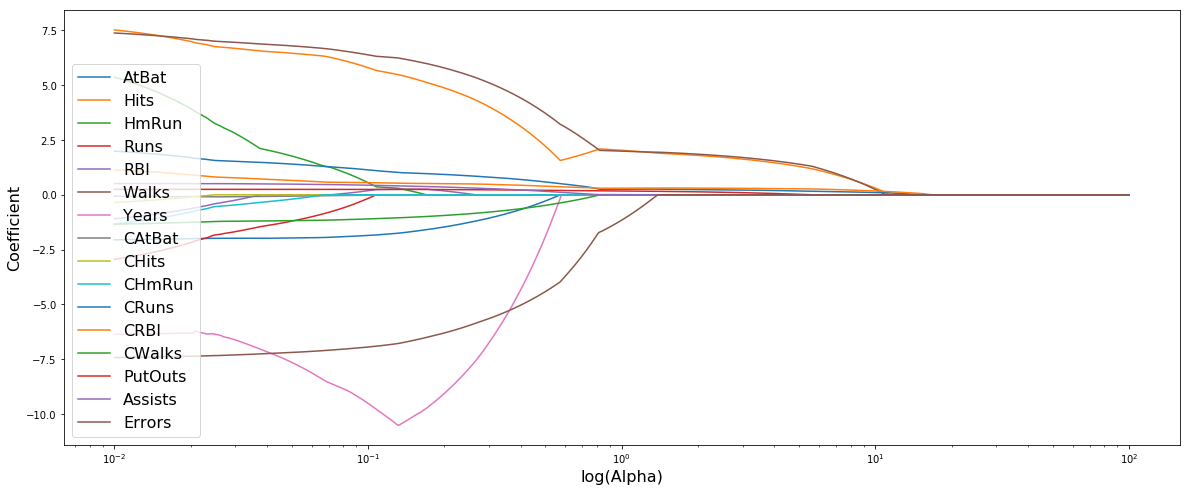

In [5]:
#Create a visualization of the coefficient trajectories
plt.figure(figsize = (20, 8))
plotLasso = plt.gca()
plotLasso.plot(alphas, coefLasso)
plotLasso.set_xscale("log")
plt.xlabel("log(Alpha)", fontsize=16)
plt.ylabel("Coefficient", fontsize=16)
plt.legend(x_train.columns, fontsize=16)
plt.show()

### 1.1.2. Comment on which are the final three predictors that remain in the model

In [6]:
#Get the aplha when has 3 nonzero predictors
k = nonzeroPredictors.index(3)
fitAlpha = alphas[k]

#Find final three predictors that remain in the model
lasso.set_params(alpha=fitAlpha)
lasso.fit(x_train, y_train)
pandas.Series(lasso.coef_, index=x.columns)

predictors = []
for i in range(16):
    if(lasso.coef_[i] != 0):
        predictors.append(x.columns[i])

print("The final three predictors that remain in the model are", predictors)

The final three predictors that remain in the model are ['Hits', 'CRuns', 'CRBI']


### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [7]:
#Find optimal alpha
lassoCv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassoCv.fit(x_train, y_train)

#Use cross-validation to find the optimal value of the regularization penalty
lasso.set_params(alpha=lassoCv.alpha_)
lasso.fit(x_train, y_train)
penalty = mean_squared_error(y_test, lasso.predict(x_test))

print("The optimal value of the regularization penalty is:", penalty)

The optimal value of the regularization penalty is: 100636.9834337045


### 1.1.4. How many predictors are left in that model?

In [8]:
#Set optimal alpha to find the number of predictors are left in that model
optimal = Lasso(alpha = lassoCv.alpha_, max_iter = 10000, normalize = True)
optimal.fit(x_train, y_train)

print("There are", np.sum(optimal.coef_ != 0), "predictors are left in that model")

There are 11 predictors are left in that model


### 1.2 Repeat with Ridge Regression. 

In [9]:
#Set up the lasso model
ridge = Ridge(normalize = True)

#Set the coefficient
coefRidge = []

#Predict Salary
for i in alphas:
    ridge.set_params(alpha=i)
    ridge.fit(x_train, y_train)
    coefRidge.append(ridge.coef_)

### 1.2.1 Visualize the coefficient trajectories

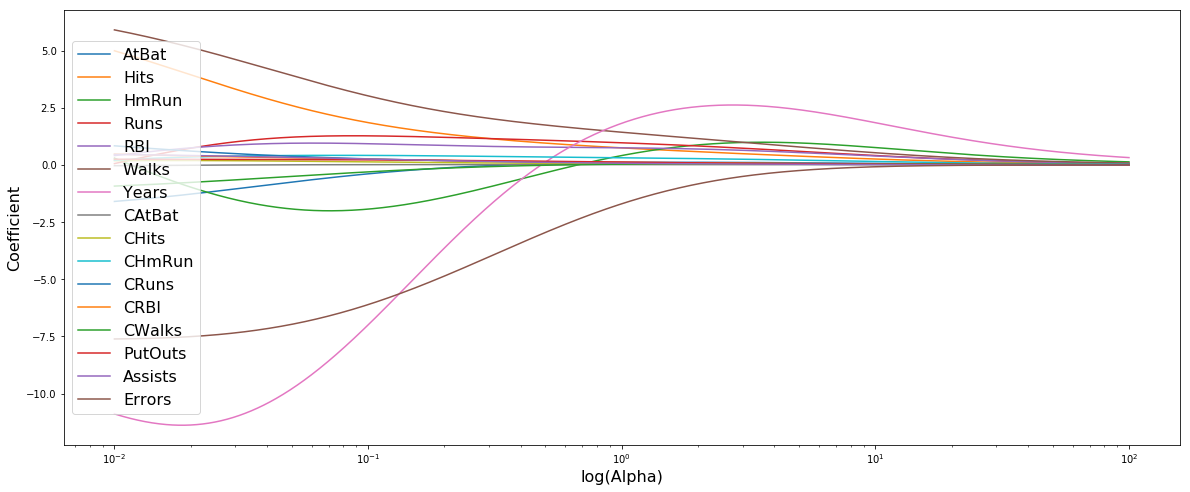

In [10]:
#Create a visualization of the coefficient trajectories
plt.figure(figsize = (20, 8))
plotRidge = plt.gca()
plotRidge.plot(alphas, coefRidge)
plotRidge.set_xscale("log")
plt.xlabel("log(Alpha)", fontsize=16)
plt.ylabel("Coefficient", fontsize=16)
plt.legend(x_train.columns, fontsize=16)
plt.show()

### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [11]:
#Find optimal alpha
ridgeCv = RidgeCV(normalize = True)
ridgeCv.fit(x_test, y_test)

#Use cross-validation to find the optimal value of the regularization penalty
ridge.set_params(alpha=ridgeCv.alpha_)
ridge.fit(x_train, y_train)
penalty = mean_squared_error(y_test, ridge.predict(x_test))

print("The optimal value of the regularization penalty is:", penalty)

The optimal value of the regularization penalty is: 100205.55399097691


## 2 Short Answer. 

### 2.1 Explain in your own words the bias-variance tradeoff

In my perspective, the bias-variance tradeoff is a method that attempt to reduce the total error by balancing the underfitting and overfitting. when underfitting both of the bias and the variace are relatively high. And when we keep learning until overfiting the bias keeps reducing but the variace is increasing. And the bias-variance tradeoff is the way that trying to find lowest total error in this circumstance.

### 2.2 What role does regularization play in this tradeoff? 

In the bias-variance tradeoff, regularization is the way that could help us to control the overfitting.

### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

Basically, the bias is decreasing and the variance is decreasing first and then increasing.
